In [44]:
import papermill as pm
import scrapbook as sb
import pandas as pd
from datetime import datetime, timedelta
import os

# Set parameters using observations in Methods and preparation

In [45]:
def last_dow(d: datetime, dow: int) -> datetime:
    '''
    Gets the date of the last day of week, using datetime convention of Monday is 0 and Sunday is 6
    '''
    dow_d = d.weekday()
    days_delta = (7 - dow) + dow_d if dow_d < dow else dow_d - dow
    return d - timedelta(days=days_delta)

In [65]:
run_dates = [(last_dow(datetime(2021, 11, 29), 0) + timedelta(days=7 * x)) for x in range(1)]
connection_string = 'sqlite:///data/data.db'
tokens = pd.read_sql(f'''SELECT DISTINCT token FROM ohlc ''', connection_string)["token"].to_list()

In [66]:
base_output_folder = os.path.expanduser('outputs')

if not os.path.exists(base_output_folder):
        os.makedirs(base_output_folder)

# Get everything

In [68]:
for run_date in run_dates:
    for token in tokens:
        print(f'running for {token} for date {run_date} to {run_date + timedelta(days=14)}', end='\r')
        res = pm.execute_notebook(
            'Template.ipynb',
            f'{base_output_folder}/market_analysis_{token}_{run_date.year}-{run_date.month}-{run_date.day}.ipynb',
            parameters = {
                'from_date': f'{run_date}',
                'to_date': f'{run_date + timedelta(days=14)}',
                'token': token,
                'connection_string': connection_string
            }
        )

Executing:   0%|          | 0/26 [00:00<?, ?cell/s]

Executing:   0%|          | 0/26 [00:00<?, ?cell/s]

Executing:   0%|          | 0/26 [00:00<?, ?cell/s]

Executing:   0%|          | 0/26 [00:00<?, ?cell/s]

Executing:   0%|          | 0/26 [00:00<?, ?cell/s]

Executing:   0%|          | 0/26 [00:00<?, ?cell/s]

Executing:   0%|          | 0/26 [00:00<?, ?cell/s]

Executing:   0%|          | 0/26 [00:00<?, ?cell/s]

Executing:   0%|          | 0/26 [00:00<?, ?cell/s]

Executing:   0%|          | 0/26 [00:00<?, ?cell/s]

Executing:   0%|          | 0/26 [00:00<?, ?cell/s]

# Summary

In [75]:
nbs = sb.read_notebooks('outputs')

In [78]:
pd.DataFrame([
    pd.Series({
        'token': scrap['token'].data,
        'from_date': scrap['from_date'].data,
        'to_date': scrap['to_date'].data,
        'avg_hourly_return': scrap['prices'].data['return'].mean(),
        'avg_volatility' : scrap['prices'].data.volatility.mean(),
        'maximum_drawdown' : scrap['prices'].data.max_drawdown.max(),
        'range_of_close_price' : scrap['prices'].data.close.iloc[-1] - scrap['prices'].data.close.iloc[0]}) 
    for book, scrap in nbs.notebook_scraps.items()
])

,token,from_date,to_date,avg_hourly_return,avg_volatility,maximum_drawdown,range_of_close_price
0,AAVE,2021-11-29 00:00:00,2021-12-13 00:00:00,-0.000806,0.212356,106.1860,-58.6450
1,ADA,2021-11-29 00:00:00,2021-12-13 00:00:00,-0.000421,0.217477,0.5682,-0.2445
2,ATOM,2021-11-29 00:00:00,2021-12-13 00:00:00,-0.000271,0.299425,14.1290,-2.7560
3,AVAX,2021-11-29 00:00:00,2021-12-13 00:00:00,-0.000609,0.286536,50.5900,-22.9300
4,BTC,2021-11-29 00:00:00,2021-12-13 00:00:00,-0.000331,0.154894,16916.7700,-6999.8400
5,COMP,2021-11-29 00:00:00,2021-12-13 00:00:00,-0.001057,0.224354,117.0500,-88.2800
6,CRV,2021-11-29 00:00:00,2021-12-13 00:00:00,-0.000712,0.328177,2.4100,-1.0362
7,DOT,2021-11-29 00:00:00,2021-12-13 00:00:00,-0.000453,0.245633,14.5300,-6.0050
8,ETH,2021-11-29 00:00:00,2021-12-13 00:00:00,-0.000048,0.174104,1209.5000,-141.7100
9,SOL,2021-11-29 00:00:00,2021-12-13 00:00:00,-0.000361,0.242432,82.0540,-26.6870


# Let's print it all

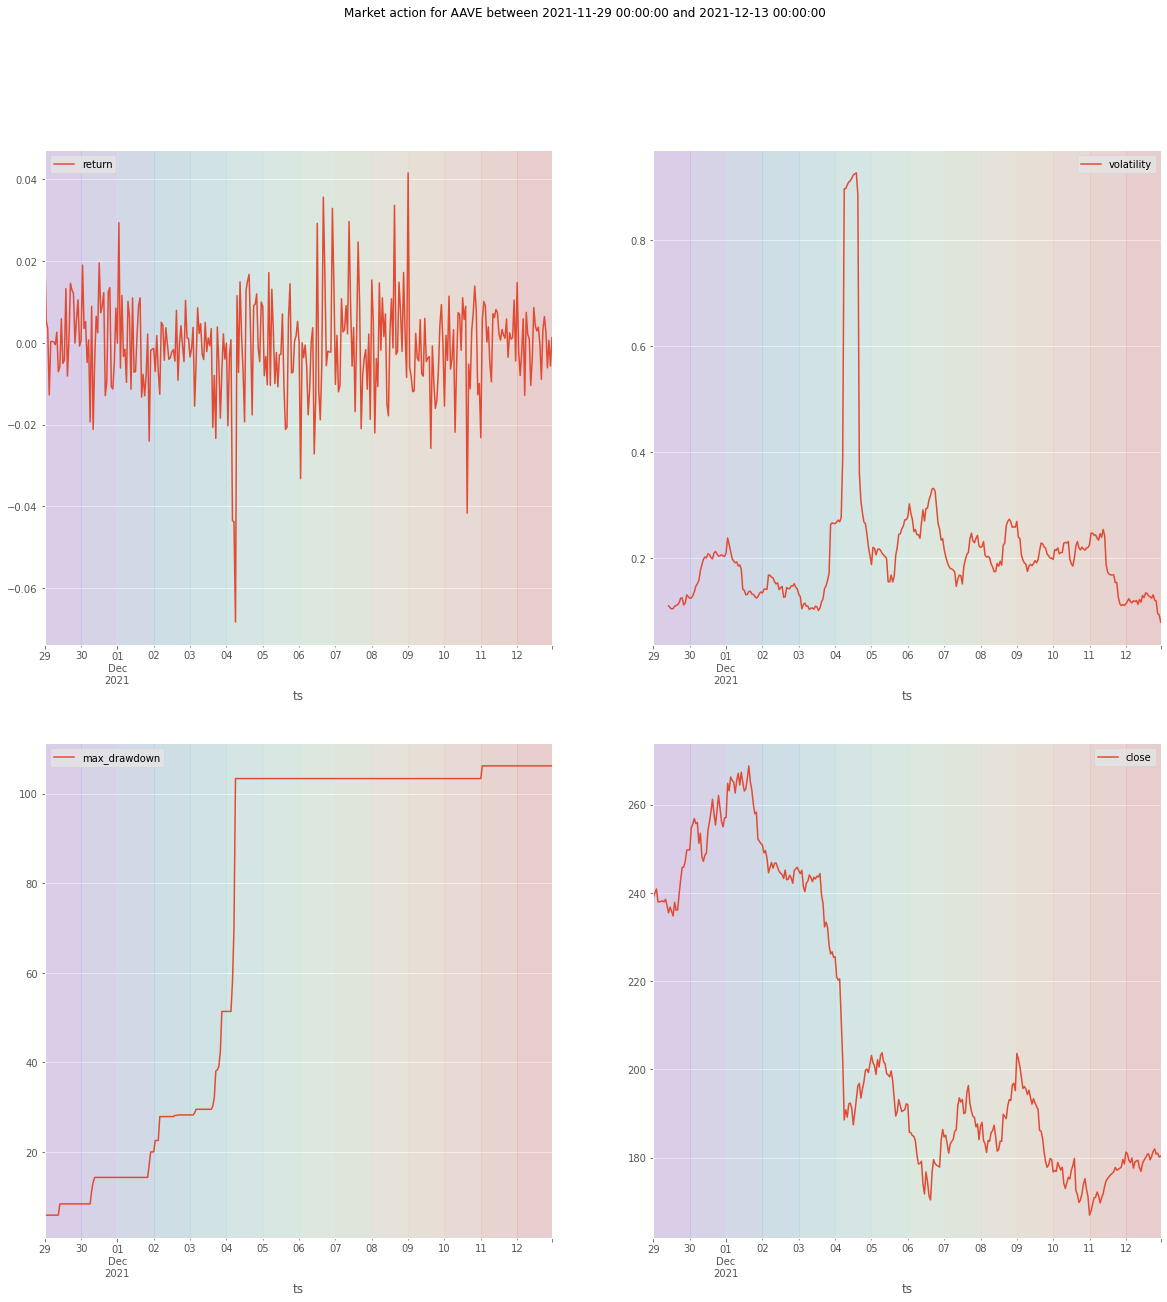

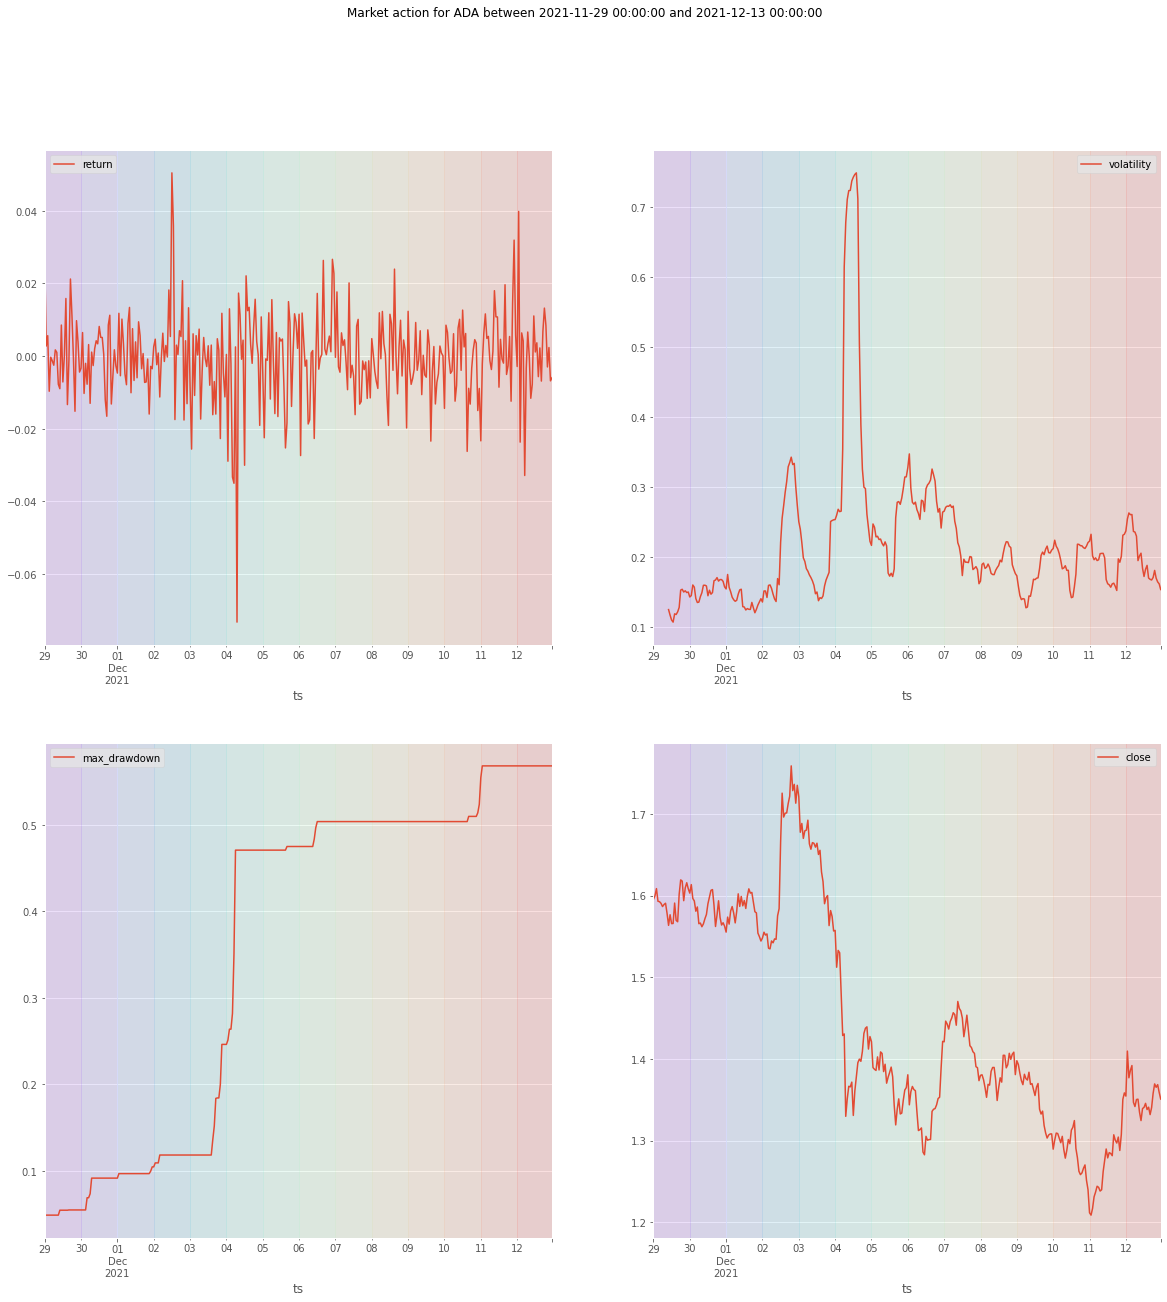

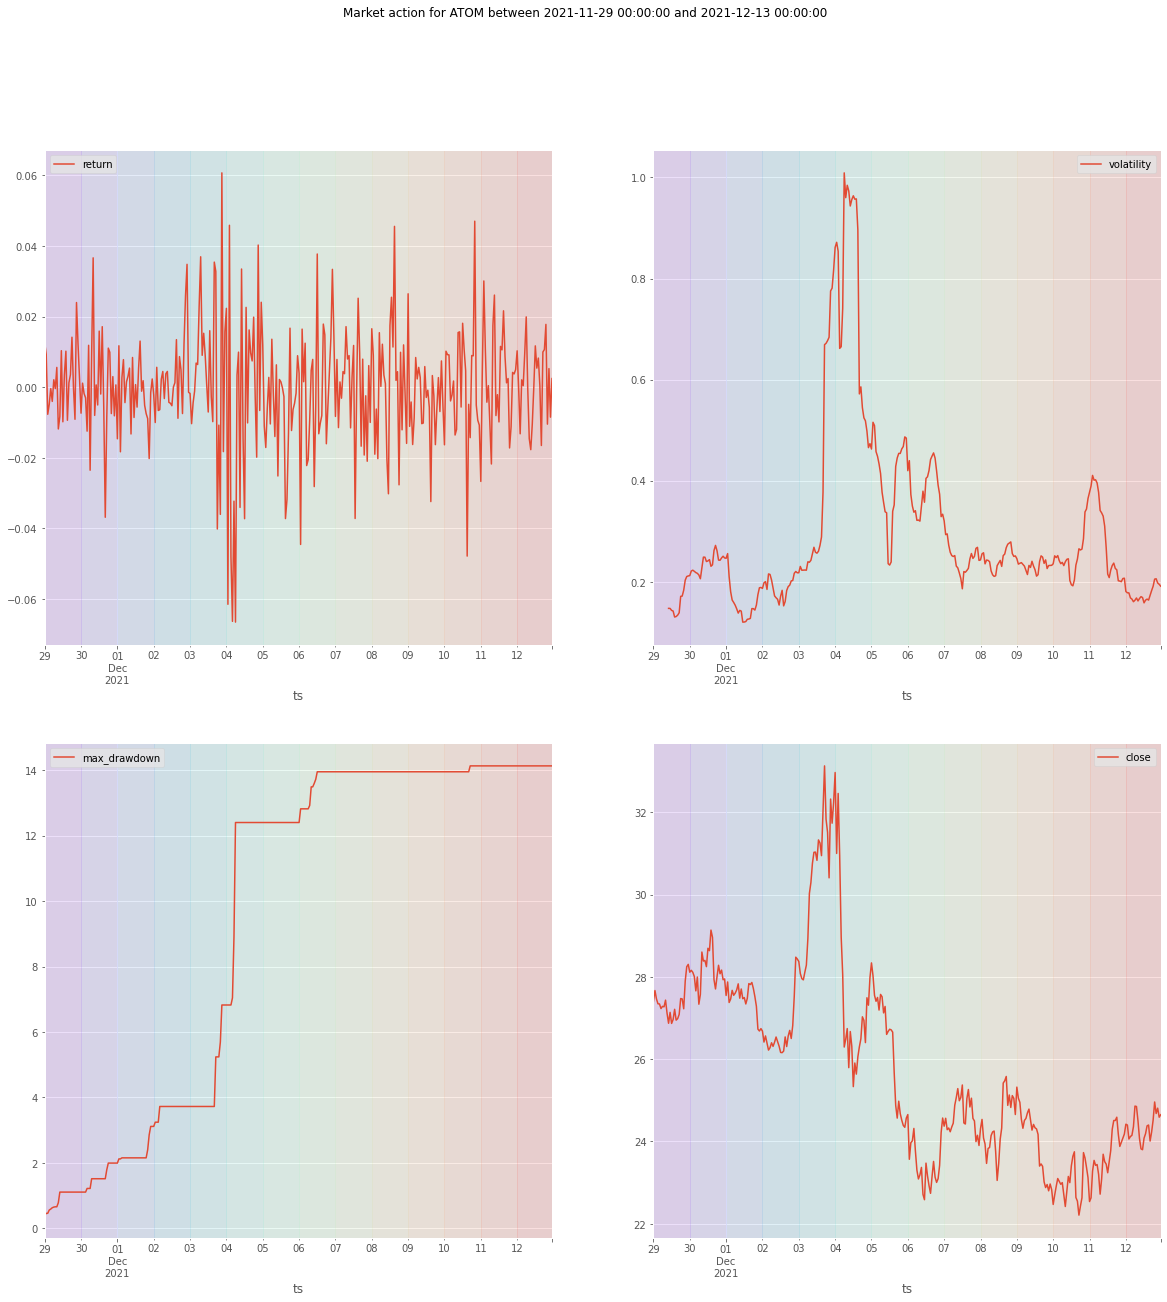

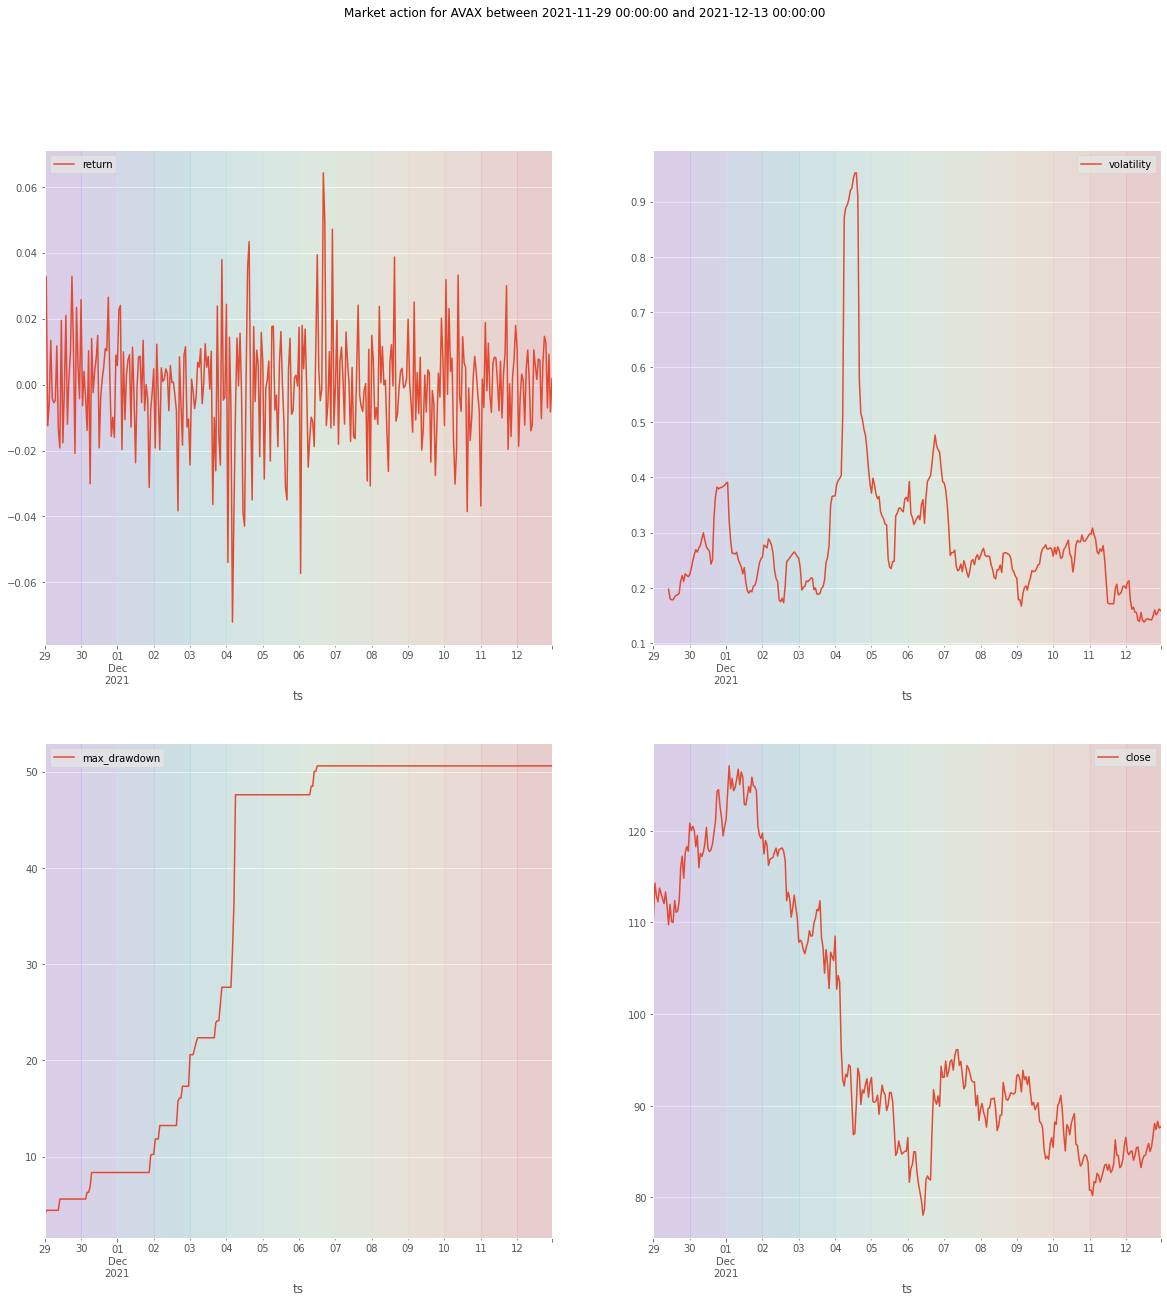

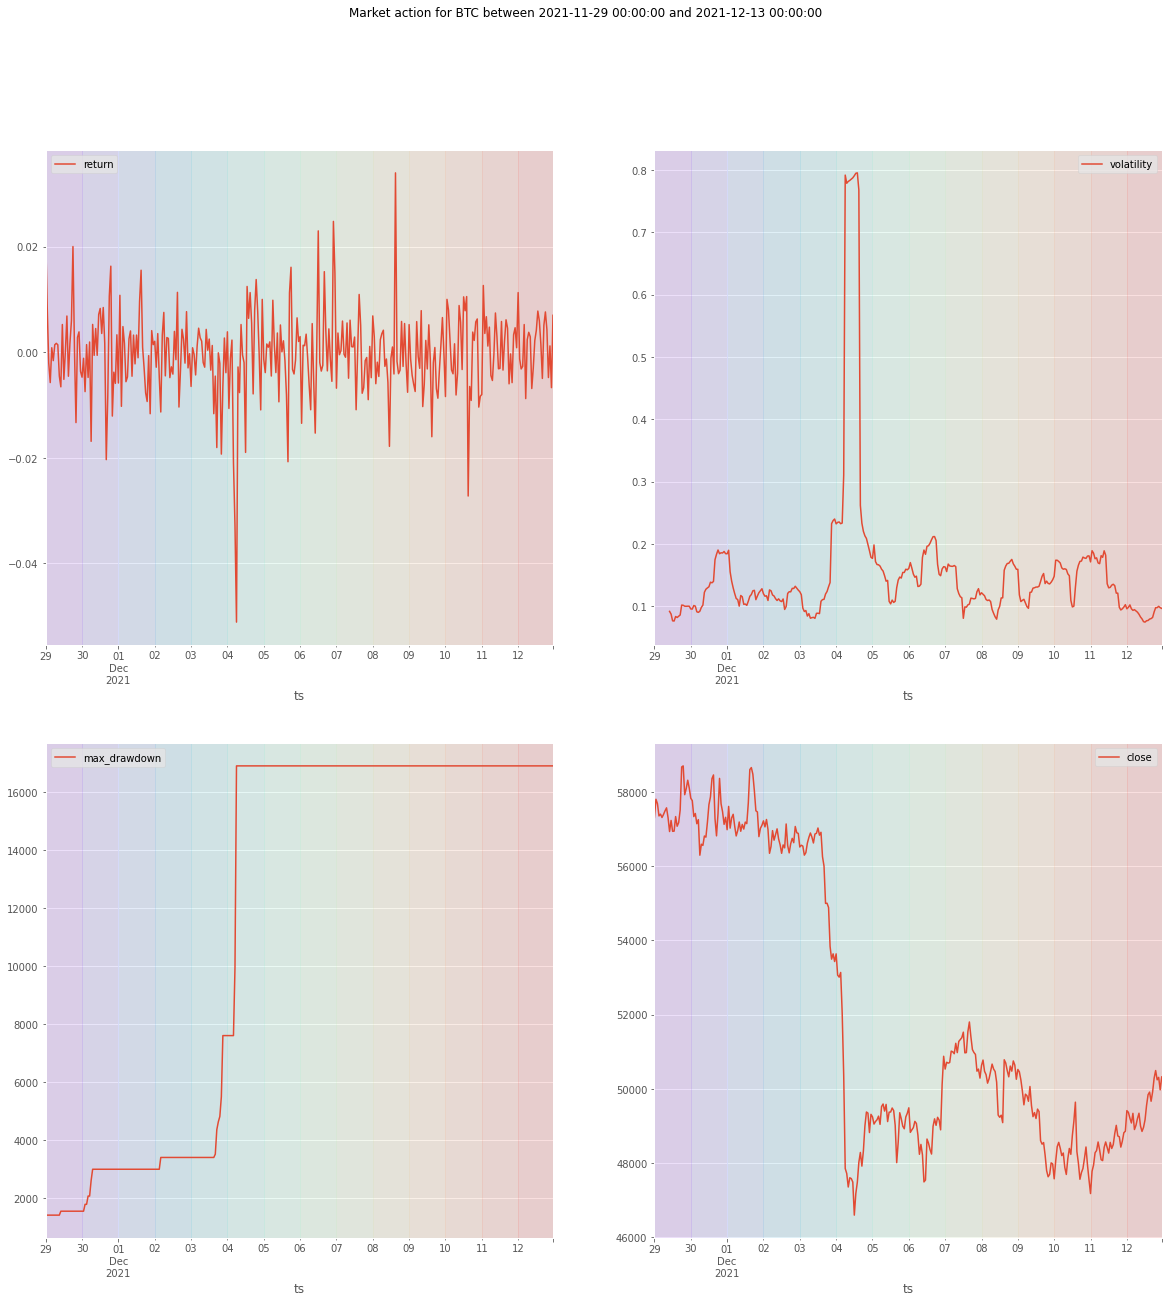

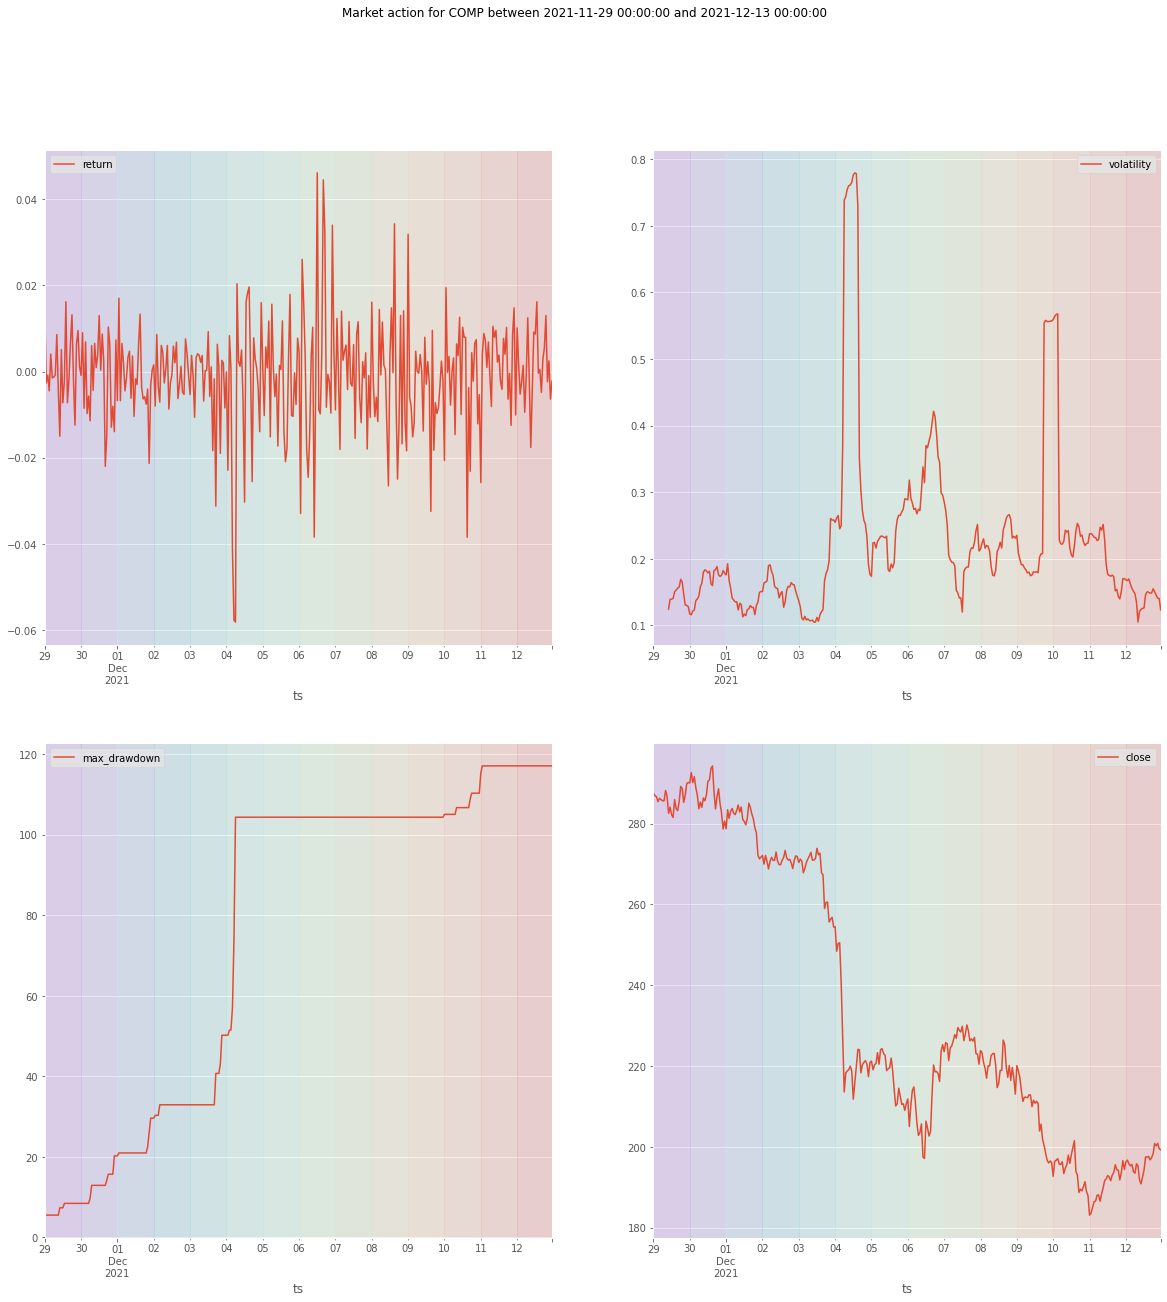

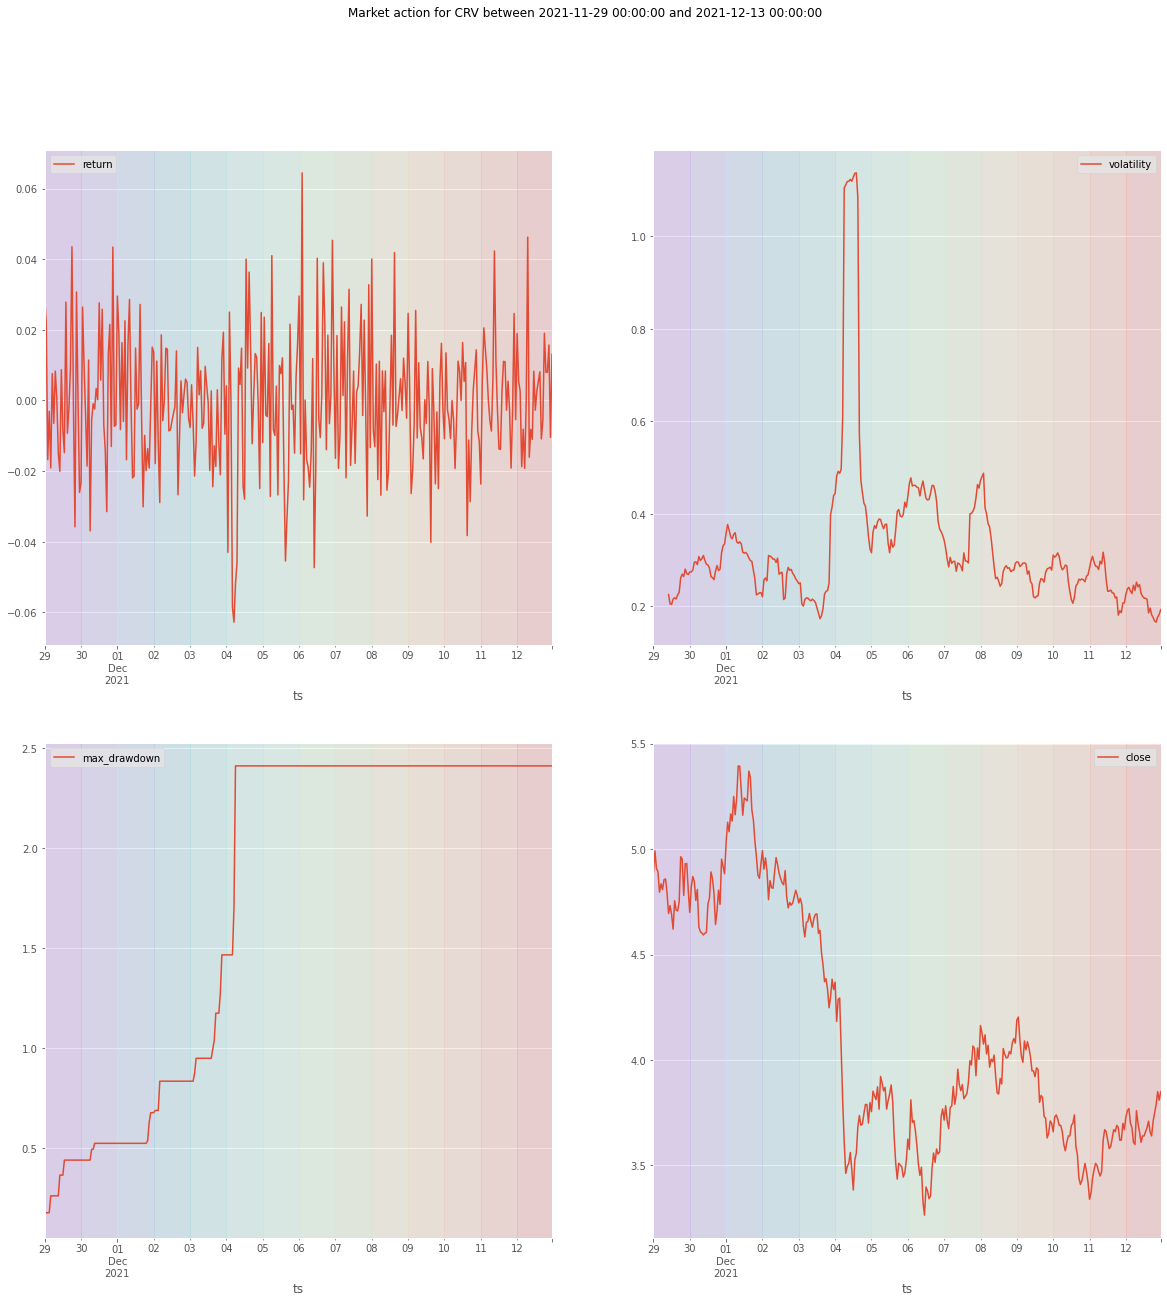

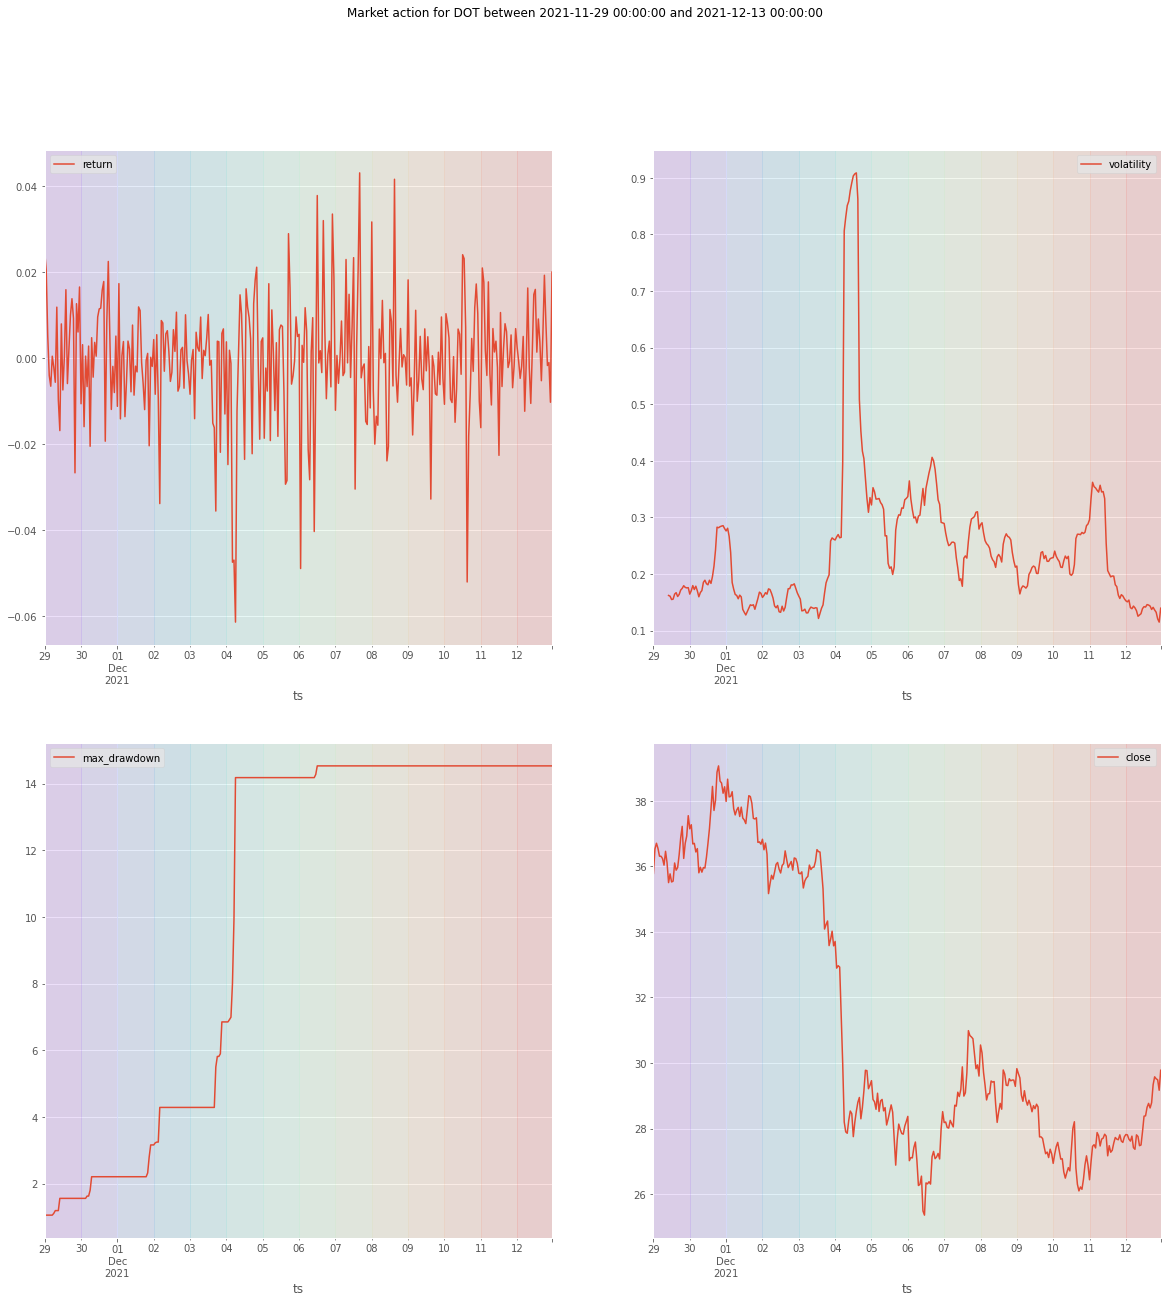

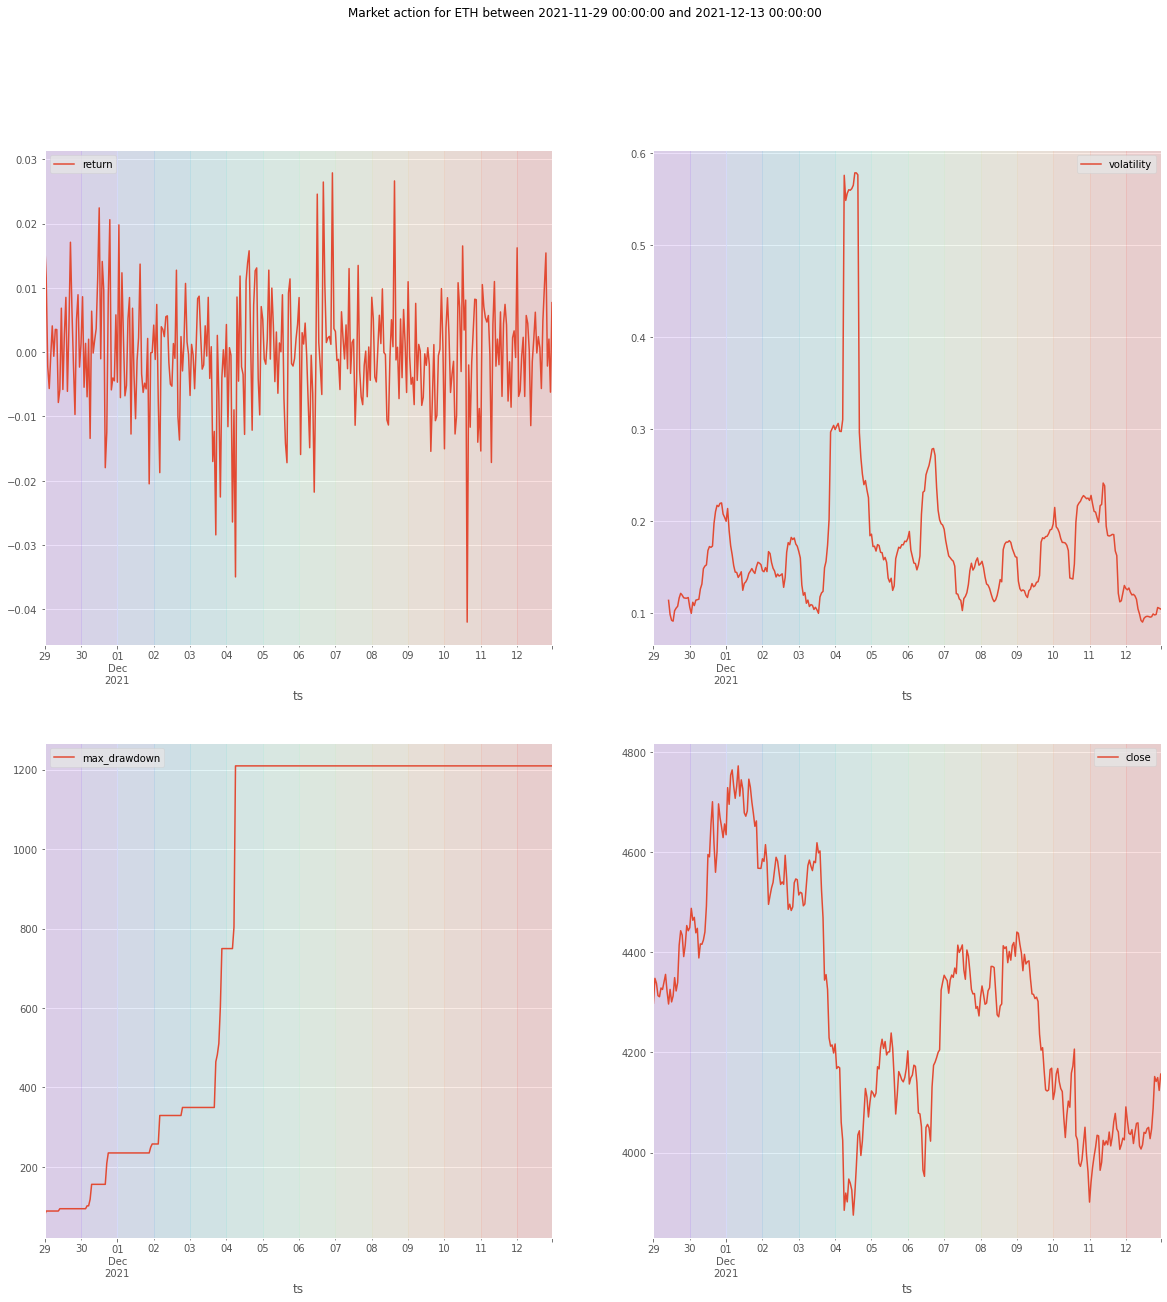

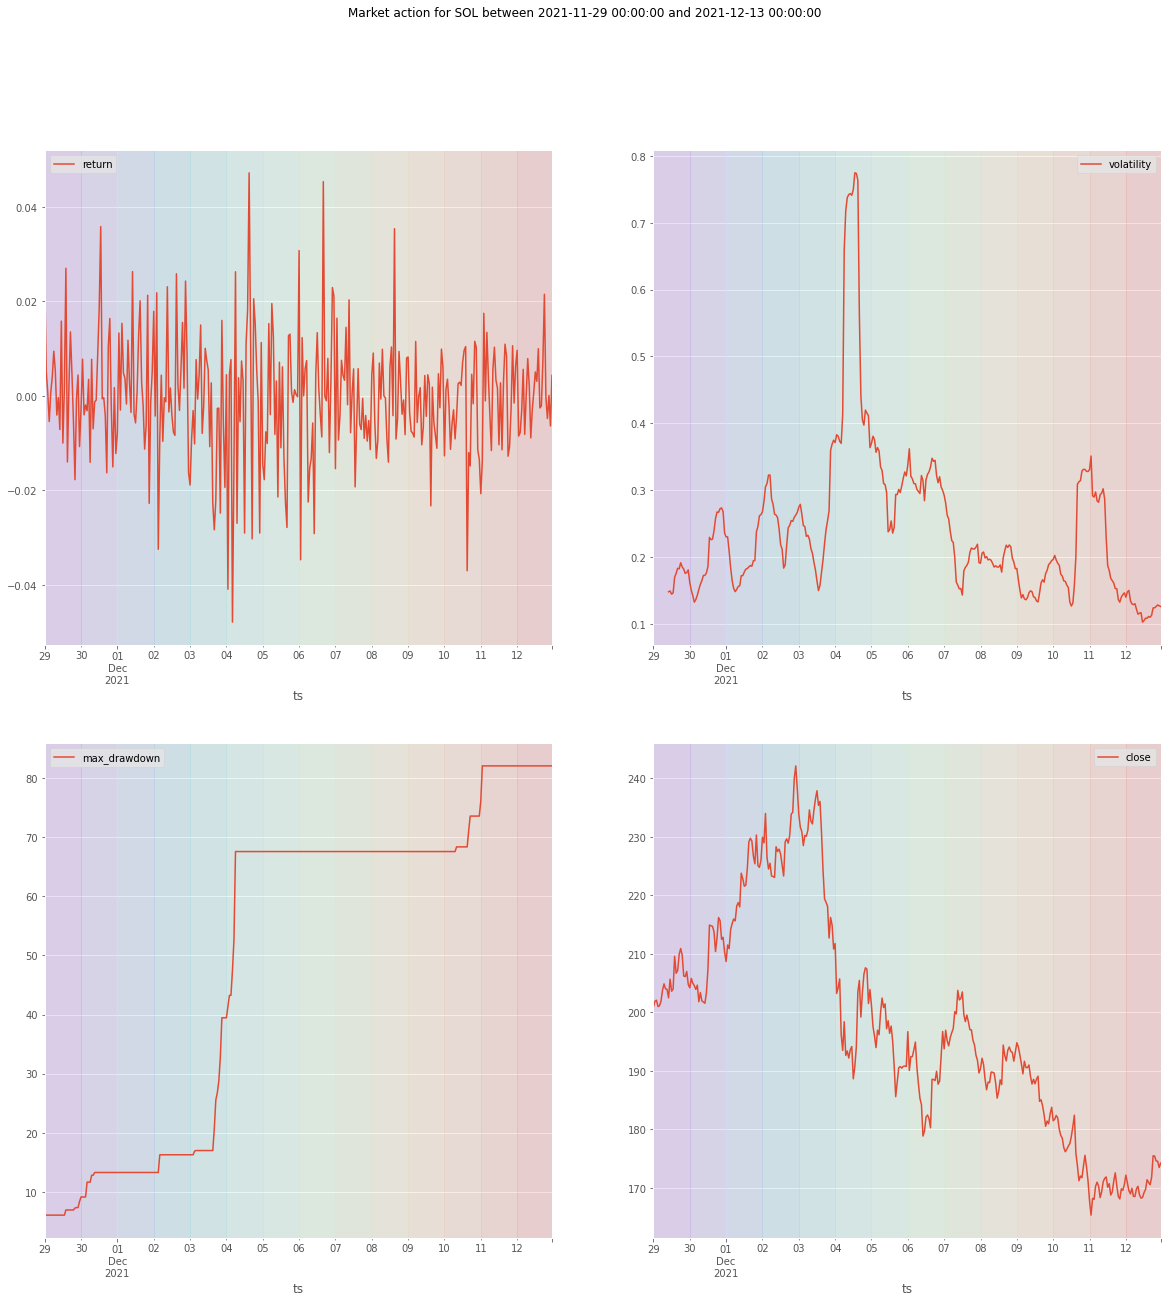

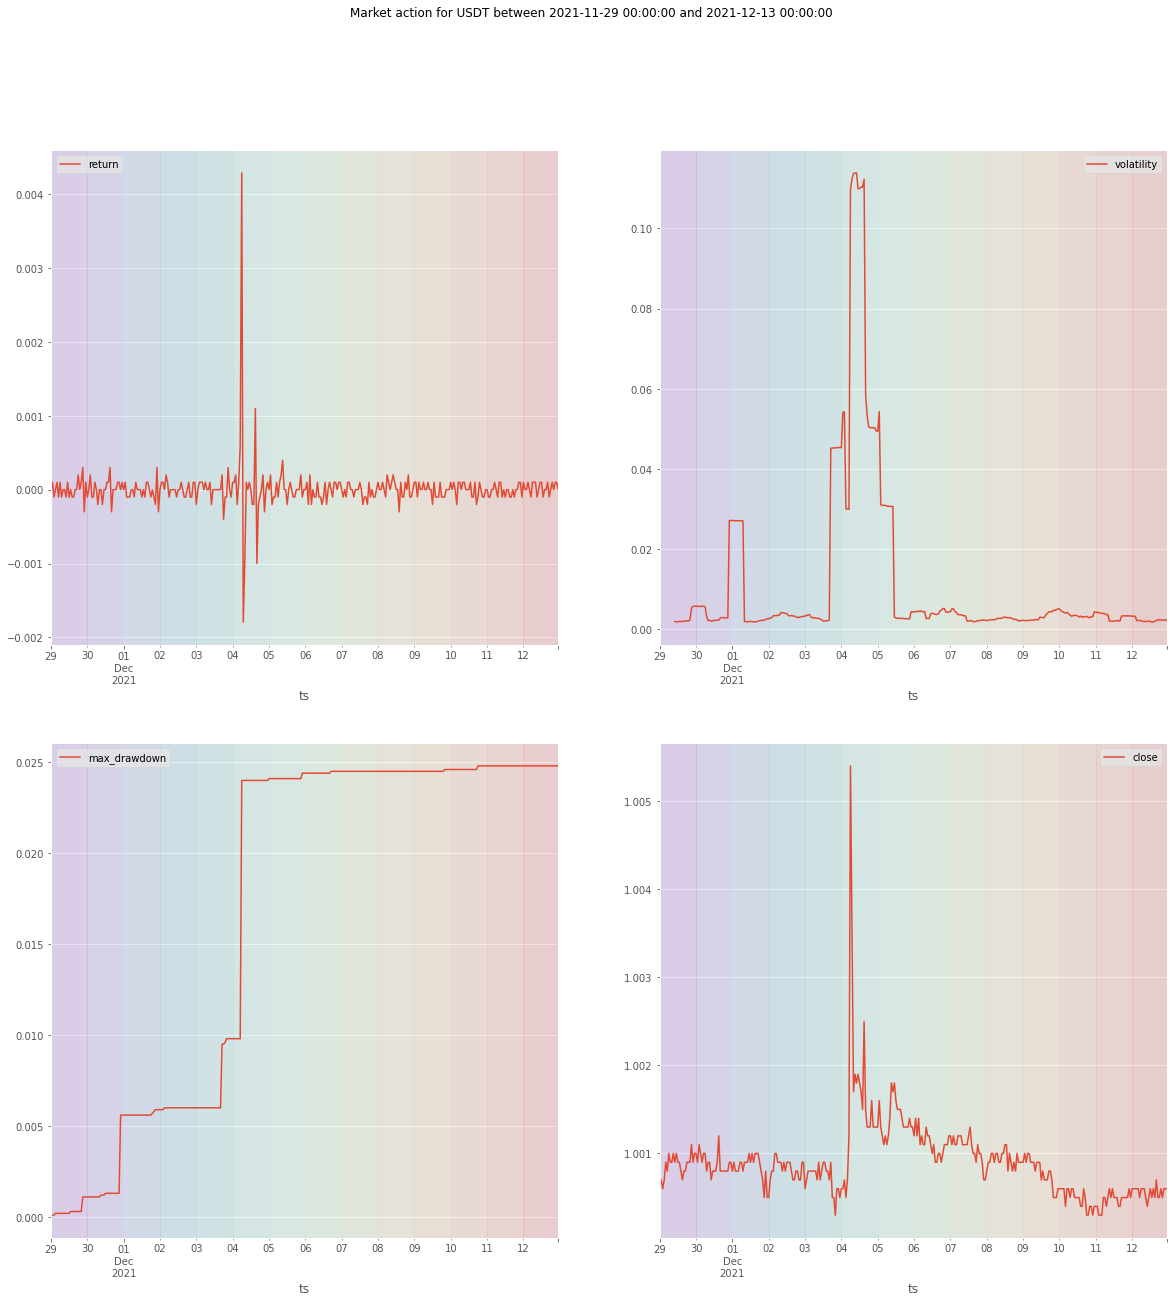

[None, None, None, None, None, None, None, None, None, None, None]

In [79]:
[nbs[nb_name].reglue('summary_plot') for nb_name in nbs]